# DS 1.1 Playground: _Gun Violence_

***

## DS Process - Modified Step #1: `Get Data`

### Import Statements and Initializations

In [1]:
import numpy as np                 # NumPy: Numerical Python -- Direct Operations on Numerical Data
import pandas as pd                # Data Manipulation Library -- High-Power, High-Computation
import seaborn as sns              # Basic Data Visualization Library -- Beautiful but Inflexible
import matplotlib.pyplot as plt    # Adv. Data Visualization Library -- Flexible but Complex
import scipy.stats as stats        # Statistical Analysis Package -- Advanced Data Analysis
import glob
pd.options.display.max_colwidth = 5000

In [2]:
PATH = "./gun-violence-data_01-2013_03-2018.csv"

df = pd.read_csv(PATH)

Pandas is _automatically hiding_ some columns for displaying/rendering purposes. Be sure to explore **ALL** of our data!

## DS Process - Modified Step #2: `Ask Question(s)`

### Looking at Data Features (Columns)

In [3]:
features = df.columns
features

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

**ASSERTION**: `n_killed` and `n_injured` are powerful _target features_ for basic data questioning.

### OVERARCHING QUESTIONS:

* What significance does the political affiliation (D/R) of the current president have on a given year's overall gun violence?

  - (EXTERNAL DATA MANIPULATION) Needs new column mapping political affiliation of current president per year. 


* What significance does the political affiliation (D/R) of a given state have on the state's overall gun violence?

  - (EXTERNAL DATA MANIPULATION) Needs new column mapping political affiliation of state governor per state per year. 

### BASIC DATA QUESTIONS:

* What is the relationship between `participant_gender` and `n_killed`/`n_injured` across our data?
* What is the relationship between `participant_age_group` and `n_killed`/`n_injured` across our data?
* What is the relationship between `state` and `n_killed`/`n_injured` across our data?
* What is `mean` of deaths; meaning if a gun violence were to happen the likelyhood of there being a death.
* Which `gun_type` is more common per case?

## DS Process - Step #3: `Explore Data`

### First Look at Our Data

In [4]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/01/17/Man-arrested-in-New-Year-s-Eve-shooting-in-McKeesport/stories/201301170275,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injured||4::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4::Subject-Suspect,http://pittsburgh.cbslocal.com/2013/01/01/4-people-shot-in-mckeesport/||http://www.wtae.com/news/local/allegheny/U-S-Marshals-task-force-arrests-New-Year-s-party-shooting-suspect/17977588||http://www.post-gazette.com/local/south/2013/01/17/Man-arrested-in-New-Year-s-Eve-shooting-in-McKeesport/stories/201301170275,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/20130105/NEWS/130109127,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4::Subject-Suspect,http://losangeles.cbslocal.com/2013/01/01/man-killed-3-wounded-at-nye-party-in-hawthorne/||http://latimesblogs.latimes.com/lanow/2013/01/hawthorne-new-year-party-three-killed.html||https://usgunviolence.wordpress.com/2013/01/01/killed-man-hawthorne-ca/||http://www.dailybulletin.com/article/zz/20130105/NEWS/130109127,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/2-men-indicted-in-new-years-day-lorain-murder/,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Seagers||3::Ladd Tate Sr||4::Tallis Moore,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, Arrested||2::Killed||3::Injured||4::Injured",0::Subject-Suspect||1::Subject-Suspect||2::Victim||3::Victim||4::Victim,http://www.morningjournal.com/general-news/20130222/lorain-man-pleads-innocent-to-new-years-murder||http://chronicle.northcoastnow.com/2013/02/14/2-men-indicted-in-new-years-day-lorain-murder/,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-shootout-killer-was-frenetic-talented-neighbor-says,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||2::Anthony Ticali||3::Sonny Archuleta,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Suspect,http://denver.cbslocal.com/2013/01/06/officer-told-neighbor-standoff-gunman-was-on-meth-binge/||http://www.westword.com/news/sonny-archuleta-triple-murder-in-aurora-guns-purchased-legally-55-57-5900504||http://www.denverpost.com/ci_22322380/aurora-shooter-was-frenetic-talented-neighbor-says||http://www.dailymail.co.uk/news/article-2258008/Sonny-Archuleta-Gunman-left-dead-latest-Aurora-shooting-lost-brother-gun-violence.html||http://www.dailydemocrat.com/20130106/aurora-shootout-killer-was-frenetic-talented-neighbor-says,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d4c723e8-5a0f-11e2-a1fa-0019bb30f31a.html,False,...,0::18||1:

### IMMEDIATE ASSERTIONS:

- `incident_id` is irrelevant for our current data investigation(s).
- `incident_url` is irrelevant for our current data investigation(s).
- `source_url` is irrelevant for our current data investigation(s).
- `incident_url_fields_missing` is irrelevant for our current data investigation(s).
- `latitude` is irrelevant for our current data investigation(s).
- `longitude` is irrelevant for our current data investigation(s).
- `sources` is irrelevant for our current data investigation(s).
***
- `congressional_district` is unnecessary for now but could hold valuable information later.
- `state_house_district` is unnecessary for now but could hold valuable information later.
- `state_senate_district` is unnecessary for now but could hold valuable information later.
- `notes` is unnecessary for now but could hold valuable information later.
- `address` is unnecessary for now but could hold valuable information later.
- `location_description` is unnecessary for now but could hold valuable information later.

For our current project, we'll treat all as invaluable and drop them from our dataset.

### NOTE: _Run only once to drop relevant data._

In [5]:
def feature_dropper(df, features_to_drop):
    for feature in features_to_drop:
        if feature in df.columns:
            df.drop(columns=[feature], inplace=True)
    return

In [6]:
FEATURES_TO_DROP = ['incident_id', 
                    'incident_url', 
                    'source_url', 
                    'incident_url_fields_missing', 
                    'latitude',
                    'longitude',
                    'sources',
                    'congressional_district',
                    'state_house_district',
                    'state_senate_district',
                    'notes',
                    'address',
                    'location_description']

In [7]:
feature_dropper(df, FEATURES_TO_DROP)

In [8]:
len(df.columns)

# Raw data should have 29 columns/features.
# Cleaned data should have 29 - len(FEATURES_TO_DROP) columns/features.

16

### NOTE: Replace state full name with their respective abbreviation

In [9]:
fullname_states = sorted(df["state"].unique())

In [10]:
abbre_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE',  'DC', 'FL', 'GA',
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
          
          
state_mapper = dict(zip(fullname_states, abbre_states))
state_mapper

df["state"] = df["state"].map(state_mapper)
df["state"].unique()
# def change_state_fullname_to_abbreviation(df=df, state):
#     """This functions changes state fullnames into their respective abbreviation"""
#     for state in df[state]:
        
#     return 

array(['PA', 'CA', 'OH', 'CO', 'NC', 'OK', 'NM', 'LA', 'MD', 'TN', 'MO',
       'DC', 'IL', 'DE', 'UT', 'MI', 'GA', 'IN', 'MS', 'NY', 'FL', 'WA',
       'SC', 'AZ', 'KY', 'NJ', 'VA', 'WI', 'RI', 'TX', 'AL', 'KS', 'CT',
       'WV', 'MN', 'NV', 'NE', 'MA', 'HI', 'NH', 'IA', 'AK', 'AR', 'ID',
       'OR', 'WY', 'ME', 'ND', 'MT', 'VT', 'SD'], dtype=object)

### NOTE: `participant_type` does not seem to map perfectly to other participant-related features. Must explore further.

In [11]:
df.tail(3)

,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type
239674,2018-03-31,LA,Gretna,0,1,0::Unknown,0::Unknown,Shot - Wounded/Injured,1.0,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim
239675,2018-03-31,TX,Houston,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)",1.0,0::42,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim
239676,2018-03-31,ME,Norridgewock,2,0,0::Unknown||1::Unknown,0::Handgun||1::Shotgun,"Shot - Dead (murder, accidental, suicide)||Suicide^||Murder/Suicide||Domestic Violence",2.0,0::58||1::62,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Marie Lancaster Hale||1::William Hale,1::Significant others - current or former,0::Killed||1::Killed,0::Victim||1::Subject-Suspect


In [12]:
df["year"] = df["date"].apply(lambda x: int(x.split("-")[0]))
df["month"] = df["date"].apply(lambda x: int(x.split("-")[1]))
df["day"] = df["date"].apply(lambda x: int(x.split("-")[2]))
# df.drop(columns=["date"], inplace=True)
df.tail(3)

,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,year,month,day
239674,2018-03-31,LA,Gretna,0,1,0::Unknown,0::Unknown,Shot - Wounded/Injured,1.0,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,2018,3,31
239675,2018-03-31,TX,Houston,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)",1.0,0::42,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim,2018,3,31
239676,2018-03-31,ME,Norridgewock,2,0,0::Unknown||1::Unknown,0::Handgun||1::Shotgun,"Shot - Dead (murder, accidental, suicide)||Suicide^||Murder/Suicide||Domestic Violence",2.0,0::58||1::62,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Marie Lancaster Hale||1::William Hale,1::Significant others - current or former,0::Killed||1::Killed,0::Victim||1::Subject-Suspect,2018,3,31


## Before we dive into `context-specific cleaning`, let's perform some `general cleaning`.

In [13]:
def show_unique_values_per_feature(feature, df=df):
    """ Displays all unique values within a single feature in your dataset. """
    return df[feature].unique().tolist()

In [14]:
def show_unique_types_per_feature(feature, df=df):
    """ Displays all unique datatypes within a single feature in your dataset. """
    types = set()
    for value in df[feature]:
        types.update([type(value)])
    return list(types)

### Testing Unique Value/Type Printer Function

In [15]:
current_feature = "n_killed"

In [16]:
show_unique_values_per_feature(current_feature)

[0, 1, 4, 2, 5, 3, 6, 7, 11, 8, 9, 10, 16, 50, 27, 17]

In [17]:
show_unique_types_per_feature(current_feature)

[int]

### Create Objects that Hold Relevant Unique Data

In [18]:
RELEVANT_FEATURES = ['n_killed',
                     'n_injured',
                     'state',
                     'date']

In [19]:
relevant_unique_vals, relevant_unique_types = dict(), dict()

for feature in RELEVANT_FEATURES:
    if feature not in relevant_unique_vals:
        relevant_unique_vals[feature] = show_unique_values_per_feature(feature)
    if feature not in relevant_unique_types:
        relevant_unique_types[feature] = show_unique_types_per_feature(feature)

In [20]:
relevant_unique_types['n_injured']

[int]

## DS Process - Step #5: Data Conveying/Visualization

#### Data Visualization works best/easiest with purely numerical data.

In [21]:
gun_deaths_by_state = df[['n_killed', 'state']]
unique_states = gun_deaths_by_state["state"].unique()
state_death_associations = dict()

for state in unique_states:
    if state not in state_death_associations:
        state_death_associations[state] = sum(gun_deaths_by_state[gun_deaths_by_state['state'] == state]["n_killed"])

### Which State has the most gun violence?

<BarContainer object of 51 artists>

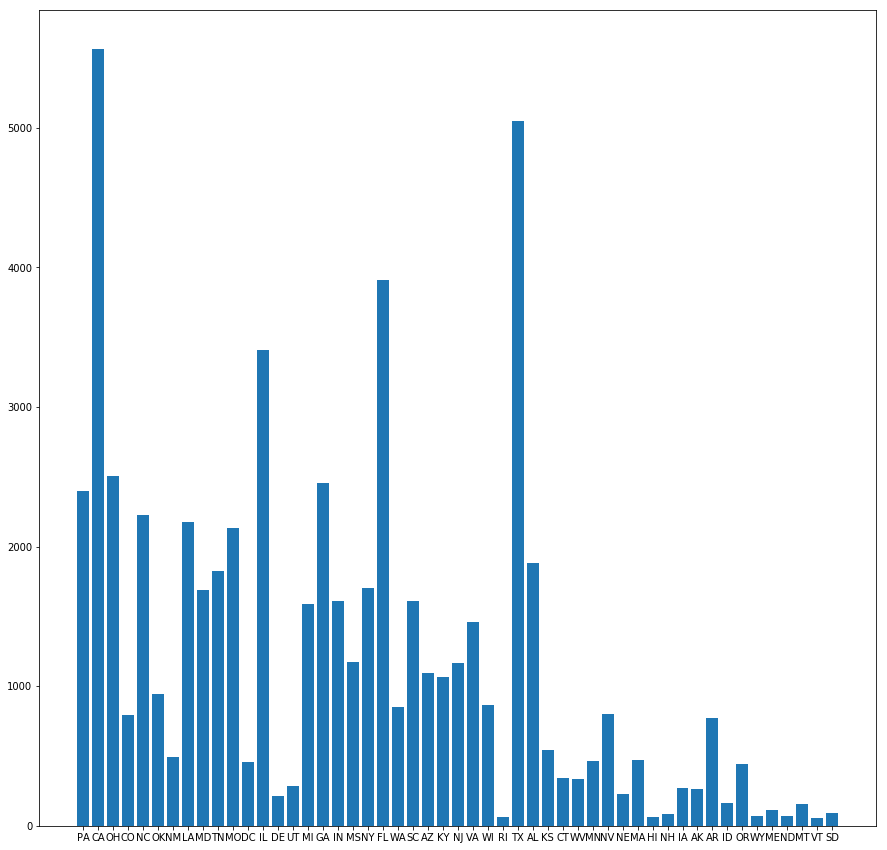

In [22]:
states = list(state_death_associations.keys())
deaths = list(state_death_associations.values())

plt.figure(figsize=(15, 15))

plt.bar(states, deaths)

### Mean of gun violence deaths?

In [23]:
# Get the total killed and total injured for each individual year.
# Graph each year in a line graph and see the increase or decrease in deaths and injured throughout the years
# This will answer: which year was the most deadliest year.
mean_deaths = df["n_killed"].sum() / len(df)
mean_deaths

0.25228953967214207

In [24]:
mean_injured = df["n_injured"].sum() / len(df)
mean_deaths

0.25228953967214207

### What year had the most injured by gun violence?

In [25]:
# Get the total of deaths and injuries for each of the states
# graph the total by state on a bar graph
df_dem = df[(df["year"] <= 2016)]
total_killed_dem = df_dem.n_injured.sum()
total_killed_dem

81528

In [26]:
df_rep = df[(df["year"] >= 2017)]
total_killed_rep = df_rep.n_killed.sum()
total_killed_rep

19044

## The first two year of Presidency Dem(Obama) vs. Rep(Trump)

In [27]:
# Here we are setting up the data to make a dataframe to know in which predency period more people were killed, 
# do people die more during a dempcratic reign or republican
# NOTE: This is Obama's second term.
death = [('Democrat - Obama; Second term', total_killed_dem), ('Republican - Trump; first term', total_killed_rep)]
labels = ['Presidency', 'Number of Deaths']
presidency_death_df = pd.DataFrame.from_records(death, columns=labels)

In [28]:
presidency_death_df

,Presidency,Number of Deaths
0,Democrat - Obama; Second term,81528
1,Republican - Trump; first term,19044


## What significance does the political affiliation (D/R) of the current president have on a given year's overall gun violence?

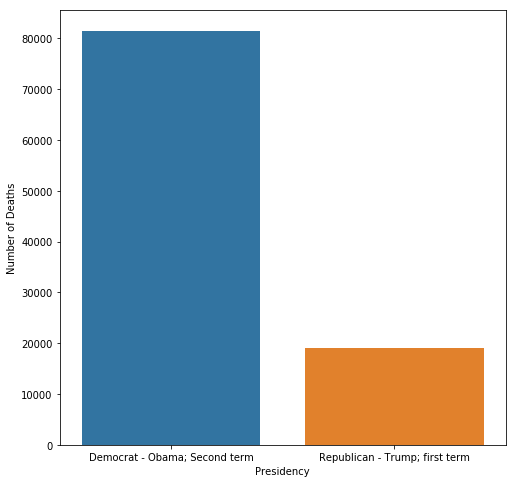

In [29]:
plt.subplots(figsize = (8,8))
sns.barplot(x=presidency_death_df['Presidency'], y=presidency_death_df['Number of Deaths'])

### Heat map of deadliest year.

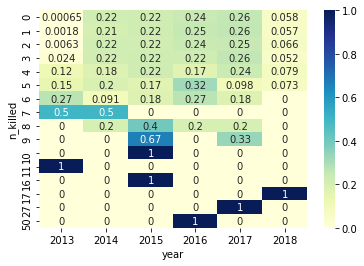

In [30]:
sns.heatmap(pd.crosstab(df['n_killed'], df['year'], normalize='index'), cmap="YlGnBu", annot=True)

### What was the deaths per state?

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


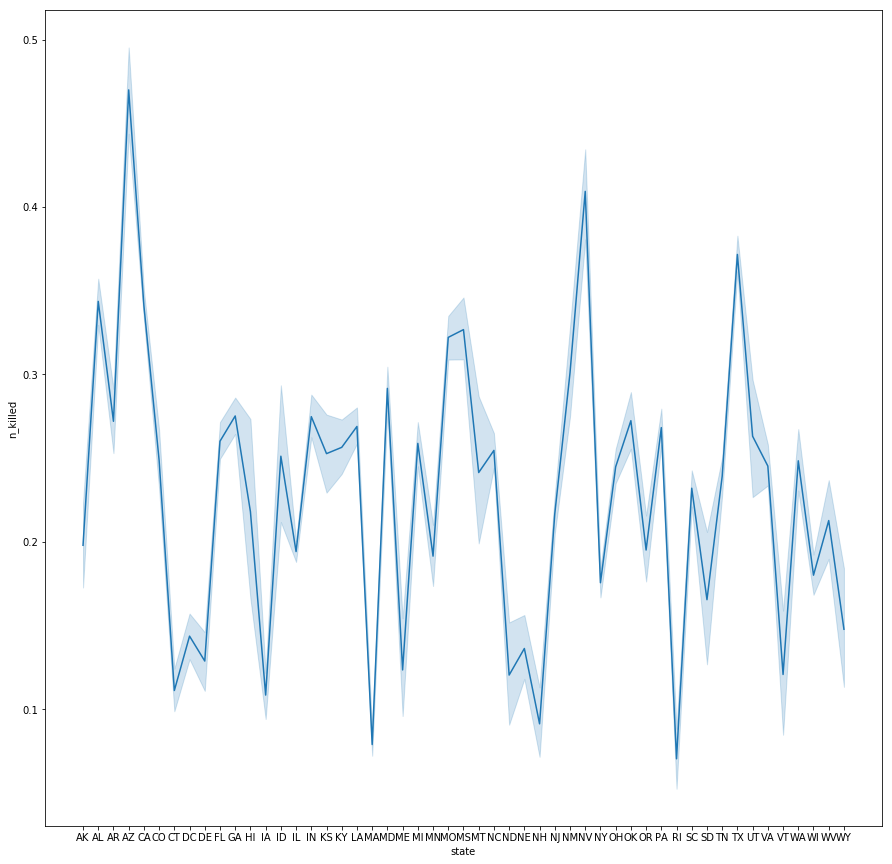

In [31]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(x="state", y="n_killed", markers=True, dashes=False, data=df, ax=ax)

### What is the injured through gun violence per state?

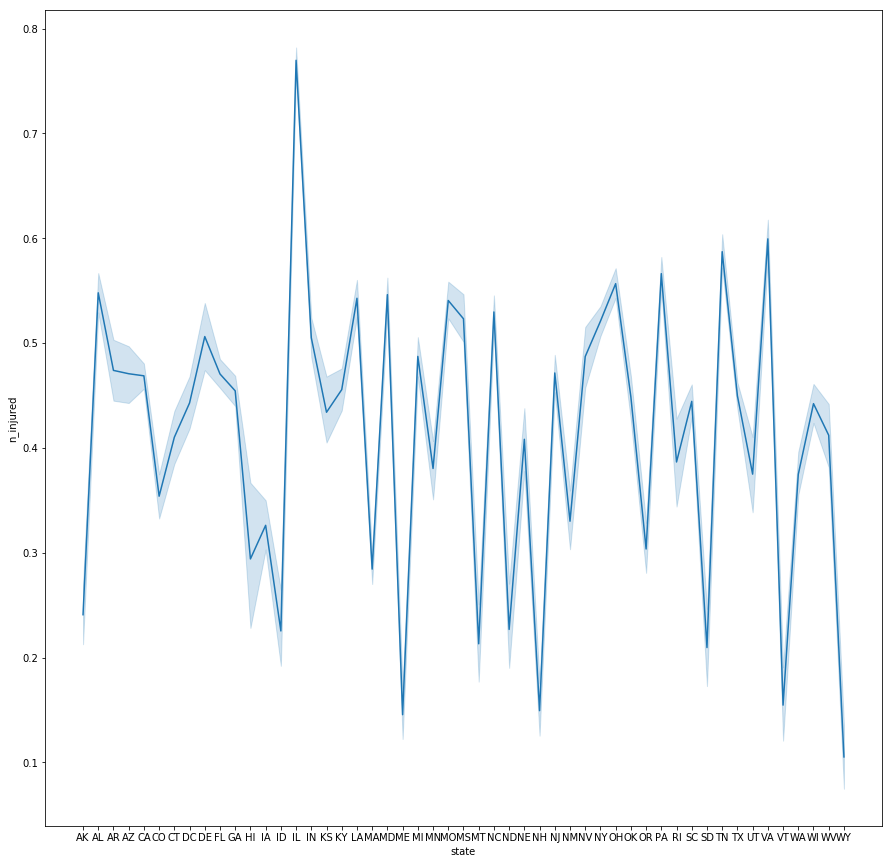

In [32]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(x="state", y="n_injured", markers=True, dashes=False, data=df, ax=ax)

In [33]:
import statistics
injured_stdev = df["n_injured"]
print("Standard Deviation of injured is % s " % (statistics.stdev(injured_stdev)))

Standard Deviation of injured is 0.7299522740856983 


In [38]:
print("Variance of the sample is % s"  %(statistics.variance(injured_stdev))) 

Variance of the sample is 0.5328303224428824


In [34]:
deaths_stdev = df["n_killed"]
print("Standard Deviation of killed is % s " % (statistics.stdev(deaths_stdev)))

Standard Deviation of killed is 0.521778872980877 


In [39]:
print("Variance of the sample is % s"  %(statistics.variance(deaths_stdev))) 

Variance of the sample is 0.2722531922891942


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


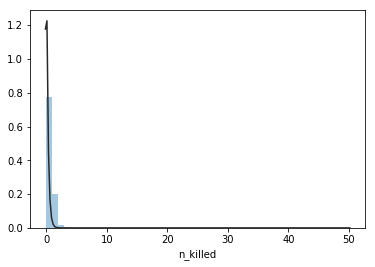

In [37]:
# KDE and PDF graphs coming... likelihood of being killed or injured if ever involved in gun violenve


# INTERESTING DATA TIDBITS

***

### NOTE: _Parkland Shooting Incident_

In [ ]:
df[df["n_killed"] == 17]

### NOTE: _Orlando Nightclub Shooting_

In [ ]:
df[df["n_killed"] == 50]

### NOTE: _Sutherland Springs Church Shooting_

In [ ]:
df[df["n_killed"] == 27]

### NOTE: _San Bernardino Shooting_

In [ ]:
df[df["n_killed"] == 16]